In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Load the dataset
file_path = '/content/PS4_GamesSales.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
# Display the first few rows to understand the structure
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


# DATA EXPLORATION

In [ ]:
# Display the summary statistics of the dataset
df.describe(include='all')

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
count,1034,825.000000,1034,825,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
unique,1031,NaN,17,152,NaN,NaN,NaN,NaN,NaN
top,Biomutant,NaN,Action,Namco Bandai Games,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,258,56,NaN,NaN,NaN,NaN,NaN
mean,NaN,2015.966061,NaN,NaN,0.204613,0.248714,0.033636,0.089014,0.576054
std,NaN,1.298360,NaN,NaN,0.563471,0.785491,0.108344,0.249410,1.583534
min,NaN,2013.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2015.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,2016.000000,NaN,NaN,0.020000,0.000000,0.000000,0.010000,0.060000
75%,NaN,2017.000000,NaN,NaN,0.120000,0.130000,0.030000,0.050000,0.357500


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
Game,0
Year,209
Genre,0
Publisher,209
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


In [ ]:
# Check the data types of each column
df.dtypes

,0
Game,object
Year,float64
Genre,object
Publisher,object
North America,float64
Europe,float64
Japan,float64
Rest of World,float64
Global,float64


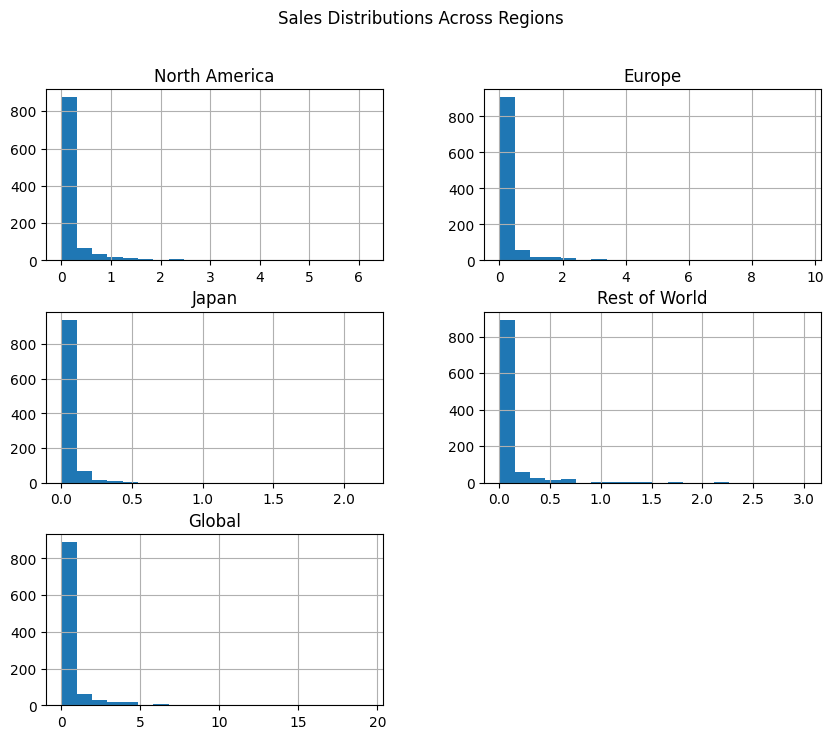

In [ ]:
# Plot histograms for numerical columns
df[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Sales Distributions Across Regions')
plt.show()

# DATA PRE-PROCESSING

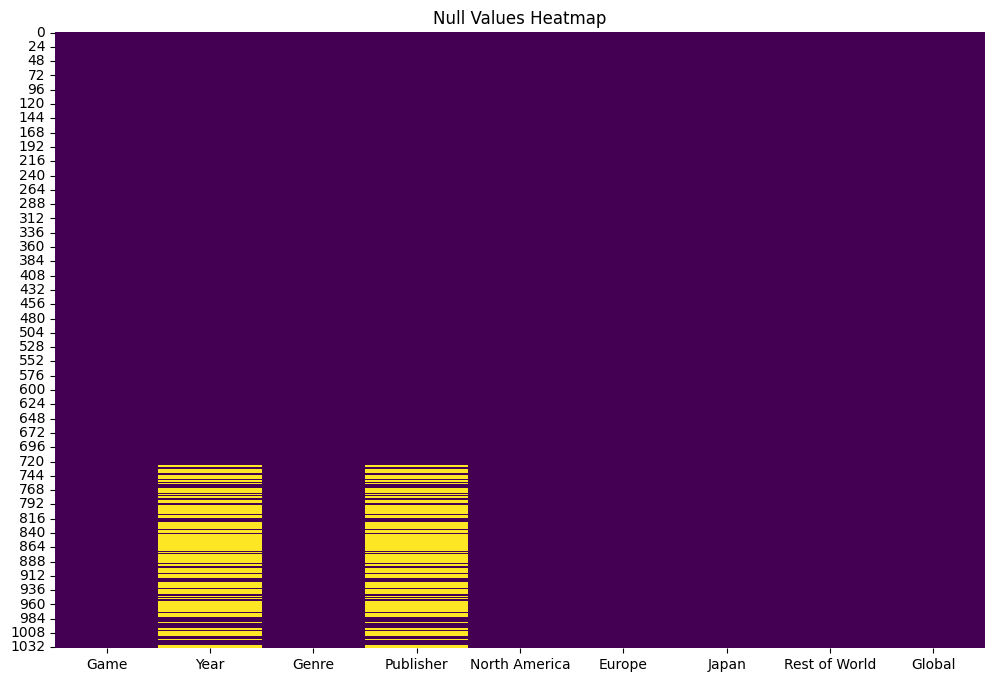

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

In [ ]:
# Drop unnecessary columns for clustering (Publisher and Year)
df_clean = df.drop(columns=['Publisher', 'Year'])

In [ ]:
# Display the cleaned data
df_clean.head()

,Game,Genre,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,Action,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,Shooter,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,Action-Adventure,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,Shooter,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,Sports,1.27,8.64,0.15,1.73,11.80


Standardizing the Data

In [ ]:
# Standardize the numerical columns using StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(df_clean[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']])

In [ ]:
# Display the scaled data
pd.DataFrame(scaled_data, columns=['North America', 'Europe', 'Japan', 'Rest of World', 'Global']).head()

,North America,Europe,Japan,Rest of World,Global
0,10.396663,12.050881,5.230001,11.757360,11.886737
1,10.609732,7.389123,3.475474,9.430748,9.169978
2,8.976205,7.592916,1.628604,8.708696,8.443402
3,7.928618,7.592916,3.383130,8.147100,8.102228
4,1.891671,10.688018,1.074543,6.582654,7.091341


# K Means Clustering



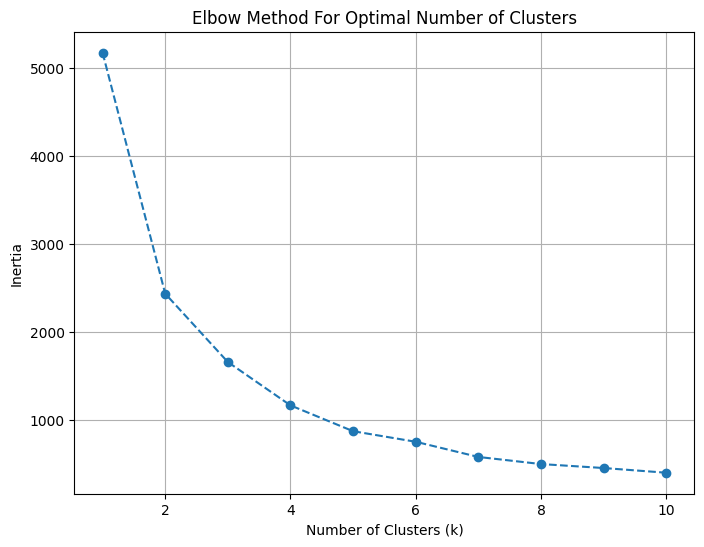

In [ ]:
# Apply the Elbow Method to find the optimal number of clusters
from sklearn.cluster import KMeans

inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

optimal number of clusters is 4. This is where we can observe the "elbow" point after this point, the reduction in inertia (within-cluster sum of squares) begins to level off significantly. While adding more clusters continues to decrease the inertia, the improvement becomes much less dramatic after k=4.

In [ ]:
#Applying K-Means with the selected number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the cleaned data
df_clean['Cluster'] = clusters

In [ ]:
# Display the first few rows with the assigned clusters
df_clean.head()

,Game,Genre,North America,Europe,Japan,Rest of World,Global,Cluster
0,Grand Theft Auto V,Action,6.06,9.71,0.60,3.02,19.39,2
1,Call of Duty: Black Ops 3,Shooter,6.18,6.05,0.41,2.44,15.09,2
2,Red Dead Redemption 2,Action-Adventure,5.26,6.21,0.21,2.26,13.94,2
3,Call of Duty: WWII,Shooter,4.67,6.21,0.40,2.12,13.40,2
4,FIFA 18,Sports,1.27,8.64,0.15,1.73,11.80,2


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_clean)

https://docs.google.com/spreadsheets/d/174hwKBk-SCQJPzt6fcU1e4A7nBjm7WA4c1mRfinf-jg#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


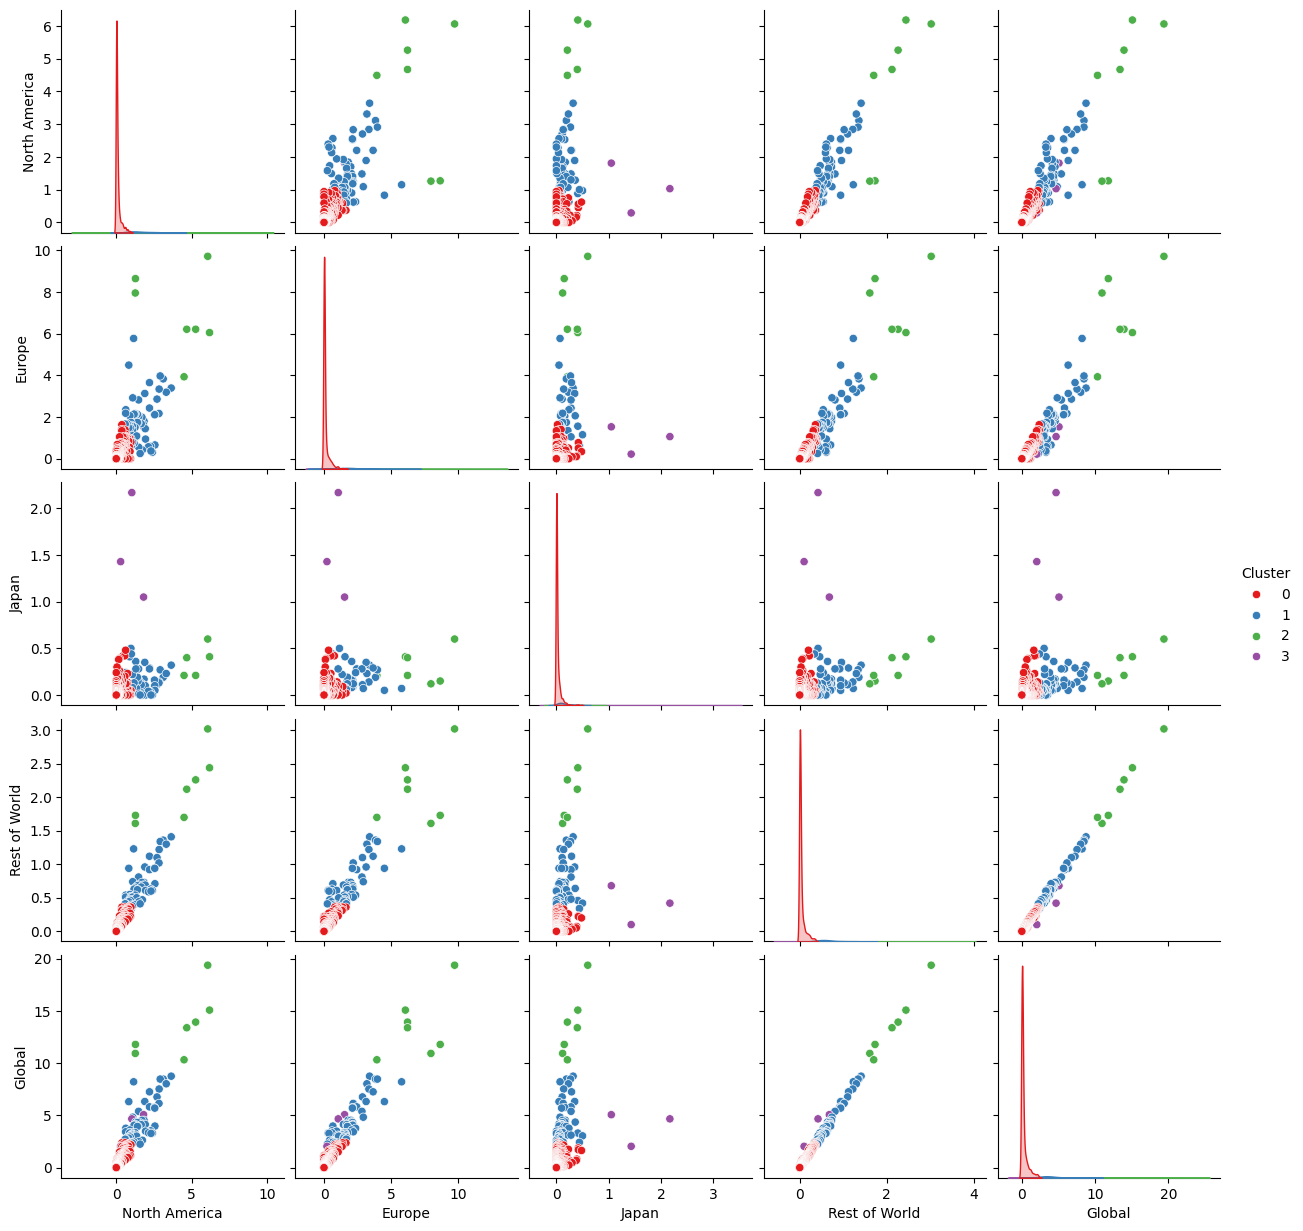

In [ ]:
# Visualizing the clusters using Seaborn's pairplot
sns.pairplot(df_clean, hue='Cluster', palette='Set1')
plt.show()

In [ ]:
# Displaying the cluster centers
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['North America', 'Europe', 'Japan', 'Rest of World', 'Global'])
cluster_centers_df

,North America,Europe,Japan,Rest of World,Global
0,0.086276,0.095788,0.020456,0.036027,0.238610
1,1.601333,1.888667,0.138500,0.687167,4.315833
2,4.170000,6.957143,0.300000,2.125714,13.555714
3,1.043333,0.936667,1.550000,0.400000,3.926667


# ANALYSIS FROM CLUSTERS

In [ ]:
# Analyze the size of each cluster
cluster_sizes = df_clean['Cluster'].value_counts()
print(cluster_sizes)

Cluster
0    964
1     60
2      7
3      3
Name: count, dtype: int64


A large cluster may represent popular games with similar sales patterns across regions.

Smaller clusters could represent outlier or niche categories, such as games that sell extremely well only in one region.

In [ ]:
# Display the cluster centers
print(cluster_centers_df)

   North America    Europe     Japan  Rest of World     Global
0       0.086276  0.095788  0.020456       0.036027   0.238610
1       1.601333  1.888667  0.138500       0.687167   4.315833
2       4.170000  6.957143  0.300000       2.125714  13.555714
3       1.043333  0.936667  1.550000       0.400000   3.926667


In [ ]:
# Calculate mean sales for each cluster across regions
cluster_sales = df_clean.groupby('Cluster')[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].mean()
print(cluster_sales)


         North America    Europe     Japan  Rest of World     Global
Cluster                                                             
0             0.086276  0.095788  0.020456       0.036027   0.238610
1             1.601333  1.888667  0.138500       0.687167   4.315833
2             4.170000  6.957143  0.300000       2.125714  13.555714
3             1.043333  0.936667  1.550000       0.400000   3.926667


<ipython-input-43-c34cdd5ccfb6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Global', data=df_clean, palette='Set2')


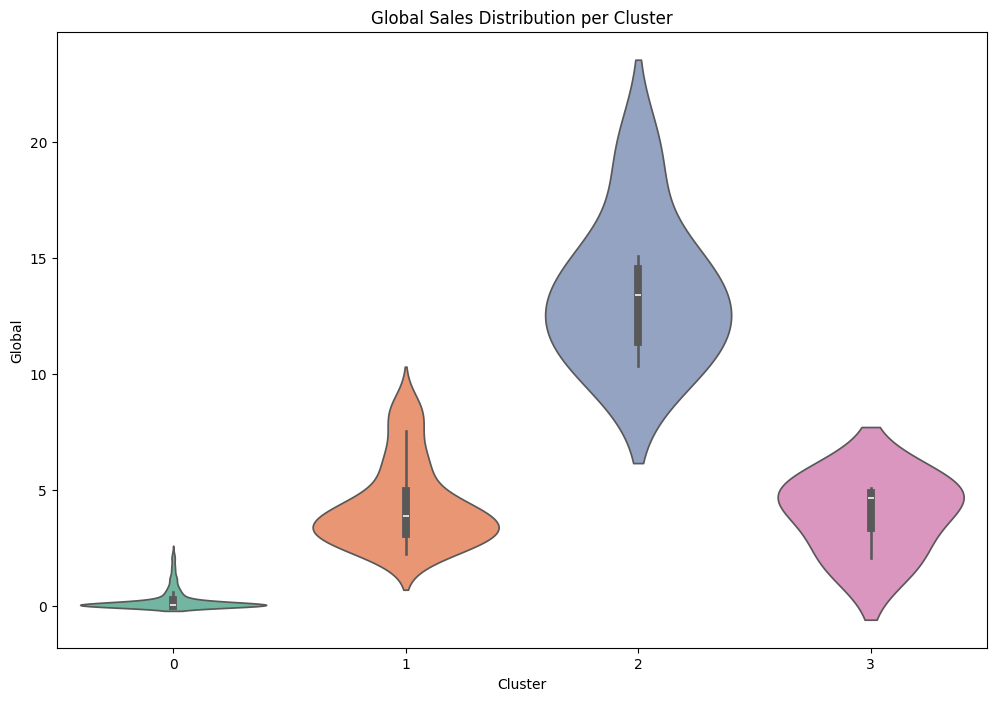

In [ ]:
# Violin plot to show the distribution of sales per cluster for each region
plt.figure(figsize=(12, 8))
sns.violinplot(x='Cluster', y='Global', data=df_clean, palette='Set2')
plt.title('Global Sales Distribution per Cluster')
plt.show()

In [ ]:
# Compare the characteristics of clusters
cluster_comparison = df_clean.groupby('Cluster')[['North America', 'Europe', 'Japan', 'Rest of World']].describe()
print(cluster_comparison)


        North America                                                        \
                count      mean       std   min     25%   50%     75%   max   
Cluster                                                                       
0               964.0  0.086276  0.160906  0.00  0.0000  0.02  0.0900  0.97   
1                60.0  1.601333  0.749335  0.59  1.0225  1.40  2.1475  3.64   
2                 7.0  4.170000  2.082899  1.26  2.8800  4.67  5.6600  6.18   
3                 3.0  1.043333  0.760088  0.29  0.6600  1.03  1.4200  1.81   

        Europe            ...  Japan       Rest of World                      \
         count      mean  ...    75%   max         count      mean       std   
Cluster                   ...                                                  
0        964.0  0.095788  ...  0.020  0.48         964.0  0.036027  0.068143   
1         60.0  1.888667  ...  0.190  0.50          60.0  0.687167  0.279115   
2          7.0  6.957143  ...  0.405  0.60    

In [ ]:
# Compare global success with individual region success per cluster
df_clean.groupby('Cluster')[['Global', 'North America', 'Europe', 'Japan', 'Rest of World']].mean()

,Global,North America,Europe,Japan,Rest of World
Cluster,,,,,
0,0.238610,0.086276,0.095788,0.020456,0.036027
1,4.315833,1.601333,1.888667,0.138500,0.687167
2,13.555714,4.170000,6.957143,0.300000,2.125714
3,3.926667,1.043333,0.936667,1.550000,0.400000


Based on the cluster analysis of video game sales across regions, here are the key findings:

1. Cluster Distribution:
- Cluster 0 (964 games): Represents games with low sales across all regions (below 1M units)
- Cluster 1 (60 games): Shows moderate success with balanced sales across regions
- Cluster 2 (7 games): Contains "blockbuster" titles with exceptional performance, particularly in North America (4.17M) and Europe (6.96M)
- Cluster 3 (3 games): Represents successful titles with good global reach but lower sales than Cluster 2

2. Regional Patterns:
- North America and Europe tend to show similar sales patterns
- Japanese market shows distinct behavior, with some games performing well there but not necessarily in other regions
- Rest of World consistently shows lower sales figures compared to other regions

3. Key Insights:
- The vast majority of games (964 out of 1034) fall into the lowest-selling cluster
- Only about 10 games (Clusters 2 and 3 combined) achieved breakthrough global success
- There's a clear hierarchy in market sizes: Europe/North America > Japan > Rest of World

4. Business Implications:
- The video game market appears to follow a "hit-driven" model where very few titles achieve exceptional success
- Regional market strategies might be necessary, especially when considering the unique characteristics of the Japanese market
- The existence of different clusters suggests different tiers of success in the gaming market, which could inform marketing and development budgets

This clustering analysis helps identify distinct patterns in global gaming success and could be valuable for publishers in setting expectations and planning marketing strategies for new game releases.